In [ ]:
pip install ftfy

     |████████████████████████████████| 71kB 4.7MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=04e1f72834e890024ecefe9d60e07c0b0d885fc041a3db24932133a61d4a79ec
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


In [20]:
import pandas as pd
import numpy as np
import re
import ftfy
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D, Flatten
from math import exp
from numpy import sign
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from keras.models import load_model

In [21]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# dfn = negative tweets
dfn=pd.read_csv('/content/drive/My Drive/FinalNegativeTweets.csv')
# dfp = positive tweets
dfp=pd.read_csv('/content/drive/My Drive/FinalPositiveTweets.csv')

In [23]:
dfn.drop(['Unnamed: 0'],axis=1,inplace=True)
dfn.head()

,TWEETS
0,The lack of this understanding is a small but ...
1,i just told my parents about my depression and...
2,depression is something i don't speak about ev...
3,Made myself a tortilla filled with pb&j. My de...
4,@WorldofOutlaws I am gonna need depression med...


In [24]:
dfp.drop(['Unnamed: 0'],axis=1,inplace=True)
dfp.head()

,TWEETS
0,omg its already 7:30 :O
1,Juuuuuuuuuuuuuuuuussssst Chillin!!
2,handed in my uniform today . i miss you ...
3,hmmmm.... i wonder how she my number @-)
4,thanks to all the haters up in my face all day...


In [25]:
# size of negative tweets
dfn.shape

(2300, 1)

In [26]:
# size of positive tweets
dfp.shape

(2300, 1)

In [27]:
abb_List = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb_List.keys()))

def expandAbbreviations(text, abb_re=abb_re):
    def replace(match):
        return abb_List[match.group(0)]
    return abb_re.sub(replace, text)

In [28]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            #remove hashtag, @mention, emoji and image URLs
            tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            
            #expand abbreviations
            tweet = expandAbbreviations(tweet)

            #removal of digits
            tweet = ' '.join(re.sub('\d+', '', tweet).split())

            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            #Removal of text in brackets ("text")
            tweet = " ".join(re.sub('\([^)]*\)', "",tweet).split())
        
            #Remaoval of sqaure brackets from text "[]"
            tweet = tweet.replace('[','').replace(']','')

            #specific cleaning
            tweet = tweet.replace(" 's","").replace('*','').replace(':',"").replace('&','').replace("'s","").replace("'","").replace('"','').replace(">","").replace("<","").replace("$","").replace("https","")

            #stop words
            stop_words = set(stopwords.words('english'))
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [29]:
# cnTweets = iterating the negative tweets
cnTweets = [x for x in dfn['TWEETS']]
# cpTweets = iterating the positive tweets
cpTweets= [x for x in dfp['TWEETS']]
# N_dataset = cleaned negative tweets
N_dataset = clean_tweets(cnTweets)
# P_dataset = cleaned positive tweets
P_dataset = clean_tweets(cpTweets)

In [30]:
# splitting the long text into short
tokenizer = Tokenizer(num_words=20000)
# we take only top 20000 most frequent words
tokenizer.fit_on_texts(N_dataset+P_dataset)

In [31]:
# storing in sequences the tokenised words
sequences_n = tokenizer.texts_to_sequences(N_dataset)
sequences_p = tokenizer.texts_to_sequences(P_dataset)

In [32]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 10761 unique tokens


In [33]:
# bringing uniformity in words length i.e 140
data_n = pad_sequences(sequences_n, maxlen=140)
data_p = pad_sequences(sequences_p, maxlen=140)
print('Shape of negative tweets:', data_n.shape)
print('Shape of positive tweets:', data_p.shape)

Shape of negative tweets: (2261, 140)
Shape of positive tweets: (2278, 140)


In [34]:
# loading pretrained Word2Vec model on Google news
word2vec=KeyedVectors.load_word2vec_format("/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [35]:
# num = no. of words
# num value we take min value btw the no. of unique words and max words if there are less unique words than the max we specified.
num = min(20000, len(word_index))+1
# dimension of embedding matrix is 300
embedding_matrix = np.zeros((num, 300))
for word, i in word_index.items():
  #.vocab = vocabulary of words
    if word in word2vec.vocab:
        embedding_matrix[i] = word2vec.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 2418


In [36]:
# label_N = array of assigned value 0 to the negative tweets
label_N = np.array([0] * 2300)
# label_P = array of assigned value 1 to the positive tweets
label_P = np.array([1] * 2300)

In [37]:
# Negative tweets dataset data_n
perm_n = np.random.permutation(len(data_n))
# idx_train_n = negative tweets training set
idx_train_n = perm_n[:int(len(data_n)*(0.8))]
# idx_train_p = negative tweets testing set
idx_test_n = perm_n[int(len(data_n)*(0.8)):]

In [38]:
# Positive tweets dataset data_p
perm_p = np.random.permutation(len(data_p))
# idx_train_p = positive tweets training set
idx_train_p = perm_p[:int(len(data_p)*(0.8))]
# idx_train_p = positive tweets testing set
idx_test_p = perm_p[int(len(data_p)*(0.8)):]

In [39]:
# combined training dataset 
train_data = np.concatenate((data_n[idx_train_n], data_p[idx_train_p]))
labels_train = np.concatenate((label_N[idx_train_n], label_P[idx_train_p]))
# combined testing dataset
test_data = np.concatenate((data_n[idx_test_n], data_p[idx_test_p]))
labels_test = np.concatenate((label_N[idx_test_n], label_P[idx_test_p]))

In [41]:
# training data
perm_train = np.random.permutation(len(train_data))
train_data = train_data[perm_train]
labels_train = labels_train[perm_train]
# testing data
perm_test = np.random.permutation(len(test_data))
test_data = test_data[perm_test]
labels_test = labels_test[perm_test]

In [42]:
model = Sequential()
# Embedded layer
model.add(Embedding(len(embedding_matrix), 300, weights=[embedding_matrix], input_length=140, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 300)          3228600   
_________________________________________________________________
conv1d (Conv1D)              (None, 140, 32)           28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2240)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2241      
Total params: 3,259,673
Trainable params: 31,073
Non-trainable params: 3,228,600
_________________________________________

In [58]:

#early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(train_data, labels_train,validation_data=(test_data,labels_test), epochs=50, batch_size=40, shuffle=True)#, #callbacks=[early_stop])
model.save('/content/drive/My Drive/depression_modelcnn.h5')

Epoch 1/50
91/91 [==============================] - 3s 38ms/step - loss: 0.0128 - acc: 0.9975 - val_loss: 0.0903 - val_acc: 0.9813
Epoch 2/50
91/91 [==============================] - 3s 38ms/step - loss: 0.0113 - acc: 0.9978 - val_loss: 0.0900 - val_acc: 0.9813
Epoch 3/50
91/91 [==============================] - 4s 39ms/step - loss: 0.0104 - acc: 0.9978 - val_loss: 0.0916 - val_acc: 0.9813
Epoch 4/50
91/91 [==============================] - 4s 39ms/step - loss: 0.0110 - acc: 0.9970 - val_loss: 0.1042 - val_acc: 0.9780
Epoch 5/50
91/91 [==============================] - 4s 39ms/step - loss: 0.0109 - acc: 0.9978 - val_loss: 0.0925 - val_acc: 0.9813
Epoch 6/50
91/91 [==============================] - 3s 38ms/step - loss: 0.0113 - acc: 0.9975 - val_loss: 0.0933 - val_acc: 0.9813
Epoch 7/50
91/91 [==============================] - 3s 38ms/step - loss: 0.0090 - acc: 0.9986 - val_loss: 0.0943 - val_acc: 0.9813
Epoch 8/50
91/91 [==============================] - 3s 38ms/step - loss: 0.0086 - a

In [59]:
labels_pred = model.predict(test_data)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(labels_test, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 98.24%


In [60]:
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       453
           1       0.97      1.00      0.98       456

    accuracy                           0.98       909
   macro avg       0.98      0.98      0.98       909
weighted avg       0.98      0.98      0.98       909



In [61]:
import matplotlib.pyplot as plt


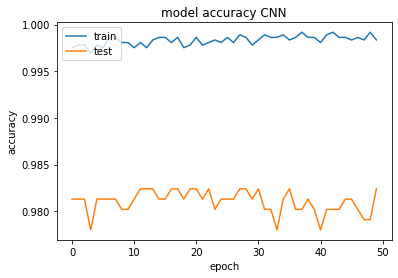

In [62]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

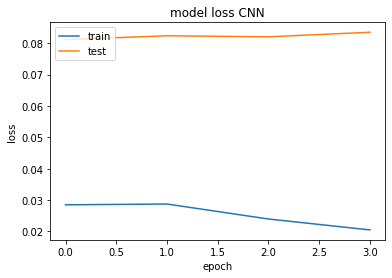

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PREDICTION ON OUR DATASET

*Loading our model*

In [ ]:
model= load_model("/content/drive/My Drive/depression_modelcnn.h5")

1

In [ ]:
td1=pd.read_csv('/content/drive/My Drive/CO-VID/@BadCOVID19Takes.csv')

In [ ]:
# Storing in List the clean tweets
T1Tweets= [x for x in td1['text']]
T_1 = clean_tweets(T1Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_1)
sequences_T1 = tokenizer.texts_to_sequences(T_1)
word_index = tokenizer.word_index
data_T1 = pad_sequences(sequences_T1, maxlen=140)

In [ ]:
# prediction
pred1 =model.predict(data_T1)
pred1 = np.round(pred1.flatten())

In [ ]:
output1=pd.DataFrame()
output1["tweet"]=T_1
output1["output"]=pred1
#enter the path of the output file with name
output1.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results1.csv', index = False)

2

In [ ]:
td2=pd.read_csv('/content/drive/My Drive/CO-VID/@Covid19Crusher.csv')

In [ ]:
# Storing in List the clean tweets
T2Tweets= [x for x in td2['text']]
T_2 = clean_tweets(T2Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_2)
sequences_T2 = tokenizer.texts_to_sequences(T_2)
word_index = tokenizer.word_index
data_T2 = pad_sequences(sequences_T2, maxlen=140)

In [ ]:
# prediction
pred2 =model.predict(data_T2)
pred2 = np.round(pred2.flatten())

In [ ]:
output2=pd.DataFrame()
output2["tweet"]=T_2
output2["output"]=pred2
#enter the path of the output file with name
output2.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results2.csv', index = False)

3

In [ ]:
td3=pd.read_csv('/content/drive/My Drive/CO-VID/@CovidJusticeUk.csv')

In [ ]:
# Storing in List the clean tweets
T3Tweets= [x for x in td3['text']]
T_3 = clean_tweets(T3Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_3)
sequences_T3 = tokenizer.texts_to_sequences(T_3)
word_index = tokenizer.word_index
data_T3 = pad_sequences(sequences_T3, maxlen=140)

In [ ]:
# prediction
pred3 =model.predict(data_T3)
pred3 = np.round(pred3.flatten())

In [ ]:
output3=pd.DataFrame()
output3["tweet"]=T_3
output3["output"]=pred3
#enter the path of the output file with name
output3.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results3.csv', index = False)

4

In [ ]:
td4=pd.read_csv('/content/drive/My Drive/CO-VID/@CurtisDonDeanoF.csv')

In [ ]:
# Storing in List the clean tweets
T4Tweets= [x for x in td4['text']]
T_4 = clean_tweets(T4Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_4)
sequences_T4 = tokenizer.texts_to_sequences(T_4)
word_index = tokenizer.word_index
data_T4 = pad_sequences(sequences_T4, maxlen=140)

In [ ]:
# prediction
pred4 =model.predict(data_T4)
pred4 = np.round(pred4.flatten())

In [ ]:
output4=pd.DataFrame()
output4["tweet"]=T_3
output4["output"]=pred3
#enter the path of the output file with name
output4.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results4.csv', index = False)

5

In [ ]:
td5=pd.read_csv('/content/drive/My Drive/CO-VID/@HowieseverinoF.csv')

In [ ]:
# Storing in List the clean tweets
T5Tweets= [x for x in td5['text']]
T_5 = clean_tweets(T5Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_5)
sequences_T5 = tokenizer.texts_to_sequences(T_5)
word_index = tokenizer.word_index
data_T5 = pad_sequences(sequences_T5, maxlen=140)

In [ ]:
# prediction
pred5 =model.predict(data_T5)
pred5 = np.round(pred5.flatten())

In [ ]:
output5=pd.DataFrame()
output5["tweet"]=T_5
output5["output"]=pred5
#enter the path of the output file with name
output5.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results5.csv', index = False)

6

In [ ]:
td6=pd.read_csv('/content/drive/My Drive/CO-VID/@Ndoeh_29F.csv')

In [ ]:
# Storing in List the clean tweets
T6Tweets= [x for x in td6['text']]
T_6 = clean_tweets(T6Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_6)
sequences_T6 = tokenizer.texts_to_sequences(T_6)
word_index = tokenizer.word_index
data_T6 = pad_sequences(sequences_T6, maxlen=140)

In [ ]:
# prediction
pred6 =model.predict(data_T6)
pred6 = np.round(pred6.flatten())

In [ ]:
output6=pd.DataFrame()
output6["tweet"]=T_6
output6["output"]=pred6
#enter the path of the output file with name
output6.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results6.csv', index = False)

7

In [ ]:
td7=pd.read_csv('/content/drive/My Drive/CO-VID/@NolaNoochF.csv')

In [ ]:
# Storing in List the clean tweets
T7Tweets= [x for x in td7['text']]
T_7 = clean_tweets(T7Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_7)
sequences_T7 = tokenizer.texts_to_sequences(T_7)
word_index = tokenizer.word_index
data_T7 = pad_sequences(sequences_T7, maxlen=140)

In [ ]:
# prediction
pred7 =model.predict(data_T7)
pred7 = np.round(pred7.flatten())

In [ ]:
output7=pd.DataFrame()
output7["tweet"]=T_7
output7["output"]=pred7
#enter the path of the output file with name
output7.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results7.csv', index = False)

8

In [ ]:
td8=pd.read_csv('/content/drive/My Drive/CO-VID/@crackedAndie FollowF.csv')

In [ ]:
# Storing in List the clean tweets
T8Tweets= [x for x in td8['text']]
T_8 = clean_tweets(T8Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_8)
sequences_T8 = tokenizer.texts_to_sequences(T_8)
word_index = tokenizer.word_index
data_T8 = pad_sequences(sequences_T8, maxlen=140)

In [ ]:
# prediction
pred8 =model.predict(data_T8)
pred8 = np.round(pred8.flatten())

In [ ]:
output8=pd.DataFrame()
output8["tweet"]=T_8
output8["output"]=pred8
#enter the path of the output file with name
output8.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results8.csv', index = False)

9

In [ ]:
td9=pd.read_csv('/content/drive/My Drive/CO-VID/@d_psycho_guruF.csv')

In [ ]:
# Storing in List the clean tweets
T9Tweets= [x for x in td9['text']]
T_9 = clean_tweets(T9Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_9)
sequences_T9 = tokenizer.texts_to_sequences(T_9)
word_index = tokenizer.word_index
data_T9 = pad_sequences(sequences_T9, maxlen=140)

In [ ]:
# prediction
pred9 =model.predict(data_T9)
pred9 = np.round(pred9.flatten())

In [ ]:
output9=pd.DataFrame()
output9["tweet"]=T_9
output9["output"]=pred9
#enter the path of the output file with name
output9.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results9.csv', index = False)

10

In [ ]:
td10=pd.read_csv('/content/drive/My Drive/CO-VID/@FacesOfCOVID.csv')

In [ ]:
# Storing in List the clean tweets
T10Tweets= [x for x in td10['text']]
T_10 = clean_tweets(T10Tweets)

In [ ]:
# preprocessing
tokenizer.fit_on_texts(T_10)
sequences_T10 = tokenizer.texts_to_sequences(T_10)
word_index = tokenizer.word_index
data_T10 = pad_sequences(sequences_T10, maxlen=140)

In [ ]:
# prediction
pred10 =model.predict(data_T10)
pred10 = np.round(pred10.flatten())

In [ ]:
output10=pd.DataFrame()
output10["tweet"]=T_10
output10["output"]=pred10
#enter the path of the output file with name
output10.to_csv('/content/drive/My Drive/CO-VID/OUTPUT_cnn/Results10.csv', index = False)

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/CO-VID/OUTPUT_cnn/")

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "/content/drive/My Drive/CO-VID/combined_cnn.csv", index=False, encoding='utf-8-sig')

In [ ]:
combined_csv.shape

(11453, 2)

In [ ]:
ds1=pd.DataFrame()
ds1=pd.read_csv("/content/drive/My Drive/CO-VID/combined_cnn.csv")

p1=pd.DataFrame()
p1=ds1.loc[ds1['output'] == 1]
n1=pd.DataFrame()
n1=ds1.loc[ds1['output'] == 0]

p1.to_csv("/content/drive/My Drive/CO-VID/positive_cnn.csv")
n1.to_csv("/content/drive/My Drive/CO-VID/negative_cnn.csv")

In [ ]:
p1.shape

(7946, 2)

In [ ]:
n1.shape

(3507, 2)

In [ ]:
all_pn=combined_csv['tweet']

In [ ]:
all_P=p1['tweet']

In [ ]:
all_N=n1['tweet']

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

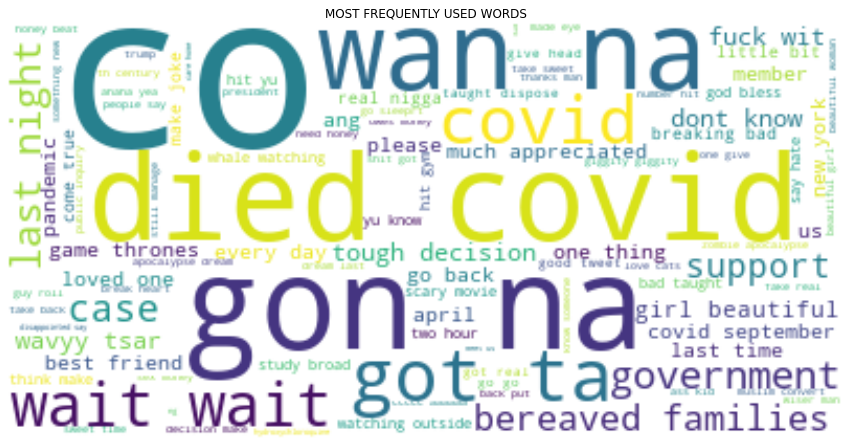

In [ ]:
txt=""
for i in all_pn:
    txt+=str(i)
wordcloud = WordCloud(background_color='white').generate(txt)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title('MOST FREQUENTLY USED WORDS')
plt.show()

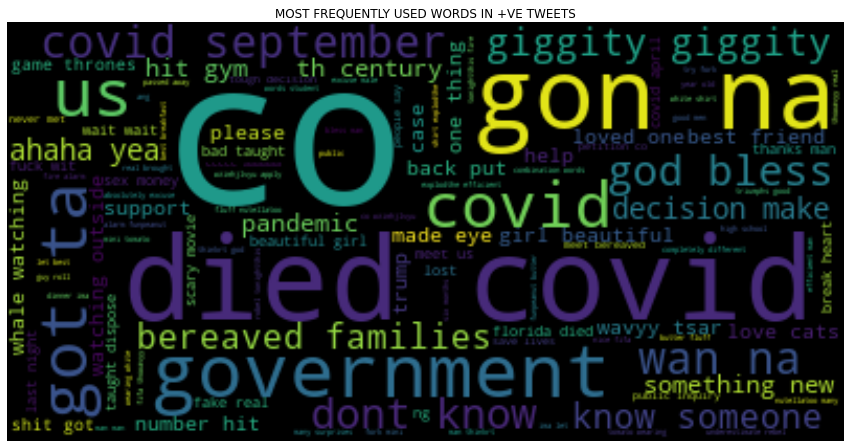

In [ ]:
txt=""
for i in all_P:
    txt+=str(i)
wordcloud = WordCloud(background_color='black').generate(txt)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title('MOST FREQUENTLY USED WORDS IN +VE TWEETS')
plt.show()

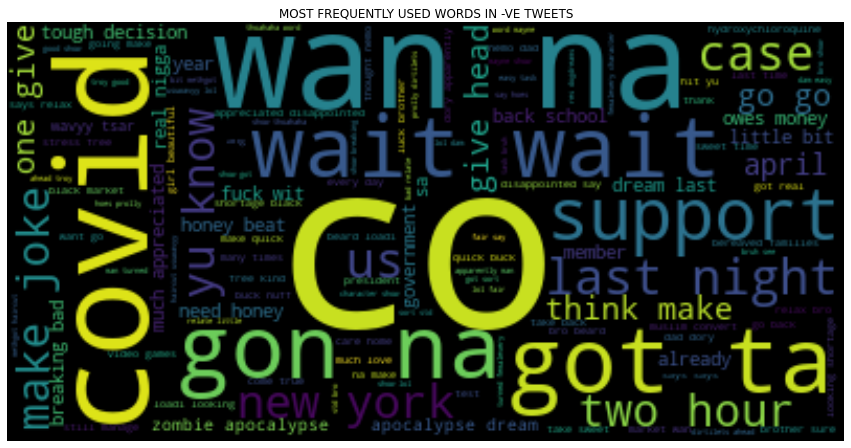

In [ ]:
txt=""
for i in all_N:
    txt+=str(i)
wordcloud = WordCloud(background_color='black').generate(txt)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title('MOST FREQUENTLY USED WORDS IN -VE TWEETS')
plt.show()